# DATA ANALYSIS

#### Basic and concepts:

Regression analysis is modeling the relationship between a response variable and a set of explanatory variables that allow us determine which of the explanatory variables have an effect on the response.
The basic idea of regression analysis is to obtain a model for the functional relationship between a response variable (referred ad the dependent variable) and explanatory variables (referred ad the independent variable).

Uses of regression models (from Ott & Longnecker, 2010):
1. The model provides a description of the major features of the data set. In some cases, a subset of the explanatory variables will not affect the response variable and hence the researcher will not have to measure or control any of these variables in future studies. This may result in significant savings in future studies or experiments.

2. The equation relating the response variable to the explanatory variables produced from the regression analysis provides estimates of the response variable for values of the explanatory not observed in the study. For example, a clinical trial is designed to study the response of a subject to various dose levels of a new drug. Because of time and budgetary constraints, only a limited number of dose levels are used in the study. The regression equation will provide estimates of the subjects’ response for dose levels not included in the study. The accuracy of these estimates will depend heavily on how well the final model fits the observed data.

3. In business applications, the prediction of future sales of a product is crucial to production planning. If the data provide a model that has a good fit in relating current sales to sales in previous months, prediction of sales in future months is possible. However, a crucial element in the accuracy of these predictions is that the business conditions during which model building data were collected remains fairly stable over the months for which the predictions are desired.

4. In some applications of regression analysis, the researcher is seeking a model which can accurately estimate the values of a variable that is difficult or expensive to measure using explanatory variables that are inexpensive to measure and obtain. If such a model is obtained, then in future applications it is possible to avoid having to obtain the values of the expensive variable by measuring the values of the inexpensive variables and using the regression equation to estimate the value of the expensive variable. For example, a physical fitness center wants to determine the physical well-being of its new clients. Maximal oxygen uptake is recognized as the single best measure of cardiorespiratory fitness but its measurement is expensive. Therefore, the director of the fitness center would want a model that provides accurate estimates of maximal oxygen uptake using easily measured variables such as weight, age, heart rate after 1-kilometer walk, time needed to walk 1 kilometer, and so on.


### Linear Regression
A simple regression modeling, there is a single independent variable (*x*) and a dependent variable (*y*) and the equation for predicting a dependent variable *y* is a linear function of a given independent variable *x* (from Ott & Longnecker, 2010).
The prediction equation is:

$$ \widehat{y} = \widehat{\beta}_0 + \widehat{\beta}_1x$$
 where $ \widehat{y}$ is the estimated value or predicted value of $ y_i $ at the specified values of $x_i$, $ \widehat{\beta}_0 $ is the intercept and $ \widehat{\beta}_1x $ is the slope. See figure 1 to understand prediction equation on a graphical way.

Since our aim is to find a prediction line that relates a dependent variable *y* and a single independent variable *x*. Nevertheless, we need assume that a simple regression  is that the relation is, in fact **linear**. According to the **assumption of linearity**, the slope of the equation doesn't change as *x* changes (figure 1).

![Figure1](IMG_AC1501B3B823-1.jpeg)
Figure 1. Linear prediction function (source Otto & Longnecker, 2010)

Assuming linearity, we would like to write *y* as a linear function of $x:y=\widehat{\beta}_0 + \widehat{\beta}_1x$. Thus, as linear function there are no space for the inevitable errors. Therefore, we must introduce a **random error term** $\varepsilon_i$ to each *y*.  model 1 should be re-written to include the errors as follows:
  $$ \widehat{y} = \widehat{\beta}_0 + \widehat{\beta}_1x + \varepsilon $$
  In fact, this equation differs from the previous one by include the error term *$\varepsilon$* includes the effects of all other factors, known or unknown. By others words, in linear regression the *$x_i$* values are usually taken as predetermined constants, and the source of randomness is *$\varepsilon_i$* terms.
  #### Formal assumptions of regression analysis (from:Otto & Longnecker, 2010)
  1. The relation is, in fact, linear, so that the errors all have expected value zero: *E($\varepsilon_i$)* = 0 for all *i*.
  2. The errors all have the same variance: Var($\varepsilon_i$) = $\sigma^2$ for all *i*.
  3. The errors are independent of each other.
  4. The errors are all normally distributed; *$\varepsilon_i$* is normally distributed for all *i*.

### Least squares
The main problem in regression analysis is to find the best straight-line prediction. Basically, best is based on the squared prediction error. We find the equation of the prediction-line, that is, the slope $\widehat{\beta}_1$ and intercept $\widehat{\beta}_0$ that minimize the total squared prediction error. This method is called **least-squares method** because it chooses $ \widehat{\beta}_0 $ and $ \widehat{\beta}_1 $ to minimize the quantity.

$$ \sum_i(y-\widehat{y}_i)^2 = \sum_i[y_i-(\widehat{\beta}_0 + \widehat{\beta}_1 x_i)]^2 $$


The **least-squares estimates of slope and intercept** are obtained as follows:

$$ \widehat{\beta}_1 = \frac{S_{xy}}{S_{xx}}  and   \widehat{\beta}_0 = \bar{y} - \widehat{\beta}_1 \bar{x}$$

$$ S_{xy} = \sum_i(x_i -\bar{x})(y_i - \bar{y}) and S_{xx} = \sum_i(x_i - \bar{x})^2 $$

Thus, $S_{xy}$ is the sum of *x* deviations times *y* deviations and $S_{xx}$ is the sum of *x* deviations squared



## Building a linear regression model
In this exercise, we will use python to build a linear regression model on five steps:
1. Reading and understanding the data;
2. Visualizing the data;
3. Performing simple linear regression;
4. Residual analysis;
5. Predictions;

#### 1. Reading and understanding the data:
We start by import the `numpy` and `pandas` libraries to the Jupyter notebook and read data using `pandas`

In [25]:
# importing numpy and pandas libraries to read the data

# surpress Warnings
import warnings
warnings.filterwarnings('ignore')

# import the numpy, pandas and matplotlib package
import pandas as pd
import csv
import numpy as np

# read data csv file, and view some sample records

LOI = pd.read_csv('LOI_final2.csv', delimiter=',')
# LOI_tupple = [tuple(row) for row in LOI.values]
LOI


,Sample,Na2O,MgO,Al2O3,SiO2,P2O5,S,K2O,CaO,TiO2,...,As,Pb,Sn,V,Cl,Mn,LOI,initial weight,final weight,Weight
0,N1,0.0365,0.0269,0.1543,0.5910,0.000502,0.0005,0.0110,0.0434,0.0054,...,0.000001,0.000008,0.000011,0.000084,0.000112,0.001375,6.05,13.2,13.071,0.129
1,N2,0.0078,0.0407,0.1268,0.5592,0.000835,0.0007,0.0254,0.0503,0.0076,...,0.000017,0.000000,0.000003,0.000107,0.000408,0.000559,14.13,13.2,12.974,0.226
2,N3,0.0055,0.0394,0.1230,0.5641,0.000896,0.0000,0.0247,0.0599,0.0075,...,0.000016,0.000000,0.000012,0.000033,0.000297,0.000514,12.38,13.2,12.995,0.205
3,N4,0.0051,0.0257,0.1875,0.4649,0.000292,0.0000,0.0236,0.0275,0.0102,...,0.000012,0.000010,0.000017,0.000099,0.000052,0.000892,16.47,13.2,12.946,0.254
4,N5,0.0123,0.0231,0.1031,0.4387,0.000637,0.0000,0.0178,0.1755,0.0049,...,0.000008,0.000000,0.000020,0.000048,0.000124,0.000290,19.13,13.2,12.914,0.286
5,N6,0.0258,0.0306,0.1509,0.6210,0.001179,0.0000,0.0144,0.0282,0.0077,...,0.000005,0.000021,0.000018,0.000065,0.000055,0.000797,5.05,13.2,13.083,0.117
6,N7,0.0344,0.0035,0.1344,0.7304,0.000524,0.0000,0.0418,0.0064,0.0016,...,0.000006,0.000023,0.000023,0.000000,0.000058,0.000193,4.55,13.2,13.089,0.111
7,N8,0.0173,0.0150,0.1739,0.6143,0.000077,0.0000,0.0432,0.0129,0.0065,...,0.000008,0.000022,0.000015,0.000042,0.000051,0.000432,6.55,13.2,13.065,0.135
8,N9,0.0021,0.1108,0.1475,0.4480,0.000808,0.0000,0.0057,0.0376,0.0125,...,0.000005,0.000000,0.000001,0.000119,0.000052,0.001055,14.30,13.2,13.972,-0.772
9,N10,0.0057,0.0328,0.1687,0.5679,0.000144,0.0000,0.0155,0.0111,0.0081,...,0.000006,0.000006,0.000006,0.000088,0.000053,0.001050,12.13,13.2,12.998,0.202


We use functions like shape, info and describe to understand and verify if there aren't anomalous values on the dataset. `Shape` gives the rows and columns number ... in other the shape of the dataset. `Info` function to identify if there are any null values in the data, and `describe` function provide some data characterization to identify.

In [26]:
# Shape of our dataset:
LOI.shape

(57, 34)

In [27]:
# Info or our dataset:
LOI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sample          57 non-null     object 
 1   Na2O            57 non-null     float64
 2   MgO             57 non-null     float64
 3   Al2O3           57 non-null     float64
 4   SiO2            57 non-null     float64
 5   P2O5            57 non-null     float64
 6   S               56 non-null     float64
 7   K2O             57 non-null     float64
 8   CaO             57 non-null     float64
 9   TiO2            57 non-null     float64
 10  Fe2O3           57 non-null     float64
 11  Rb              57 non-null     float64
 12  Sr              57 non-null     float64
 13  Y               57 non-null     float64
 14  Zr              57 non-null     float64
 15  Nb              57 non-null     float64
 16  Ba              57 non-null     float64
 17  Th              57 non-null     objec

In [28]:
# Describe our dataset:
LOI.describe()

,Na2O,MgO,Al2O3,SiO2,P2O5,S,K2O,CaO,TiO2,Fe2O3,...,As,Pb,Sn,V,Cl,Mn,LOI,initial weight,final weight,Weight
count,57.000000,57.000000,57.000000,57.000000,57.000000,56.000000,57.000000,57.000000,57.000000,57.000000,...,57.000000,57.000000,56.000000,56.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000
mean,0.014533,0.031465,0.123811,0.499712,0.000413,0.000393,0.021042,0.093588,0.006112,0.053147,...,0.000012,0.000011,0.000010,0.000060,0.000221,0.000816,14.486842,12.968421,12.683825,0.284596
std,0.011635,0.027716,0.042132,0.151821,0.000430,0.000986,0.011665,0.096484,0.002885,0.028083,...,0.000013,0.000013,0.000009,0.000032,0.000399,0.000580,8.219142,1.748383,1.801762,0.568919
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.772000
25%,0.005500,0.016200,0.103100,0.436800,0.000156,0.000000,0.014500,0.017000,0.004200,0.033100,...,0.000005,0.000000,0.000003,0.000041,0.000054,0.000432,8.880000,13.200000,12.909000,0.150000
50%,0.009500,0.029900,0.127500,0.551300,0.000288,0.000050,0.019100,0.062500,0.006500,0.053200,...,0.000008,0.000006,0.000008,0.000054,0.000065,0.000748,12.970000,13.200000,12.977000,0.212000
75%,0.021100,0.037600,0.154300,0.578300,0.000524,0.000225,0.025700,0.150400,0.007700,0.071300,...,0.000012,0.000017,0.000016,0.000080,0.000160,0.001055,19.220000,13.200000,13.030000,0.288000
max,0.044900,0.183700,0.191000,0.780600,0.002702,0.005900,0.047900,0.365200,0.014600,0.154200,...,0.000060,0.000052,0.000036,0.000153,0.002085,0.003223,46.130000,13.200000,13.972000,4.320000


#### 2. Visualizing the data:
On this step our aim is to visualize data to understand and try to establish correlations amongst the different parameters.

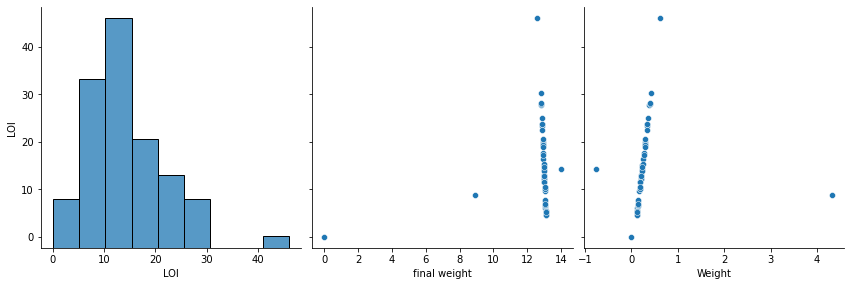

In [29]:
# Import matplotlib and seaborn libraries to visualize the data
import matplotlib.pyplot as plt
import seaborn as sns

# Using pairplot we'll visualize the data for correlation
sns.pairplot(LOI, x_vars=['LOI','final weight','Weight'],
             y_vars='LOI', size=4, aspect=1, kind='scatter')
plt.show()

In case patterns aren't visible we can use a heatmap from the `seaborn` package.

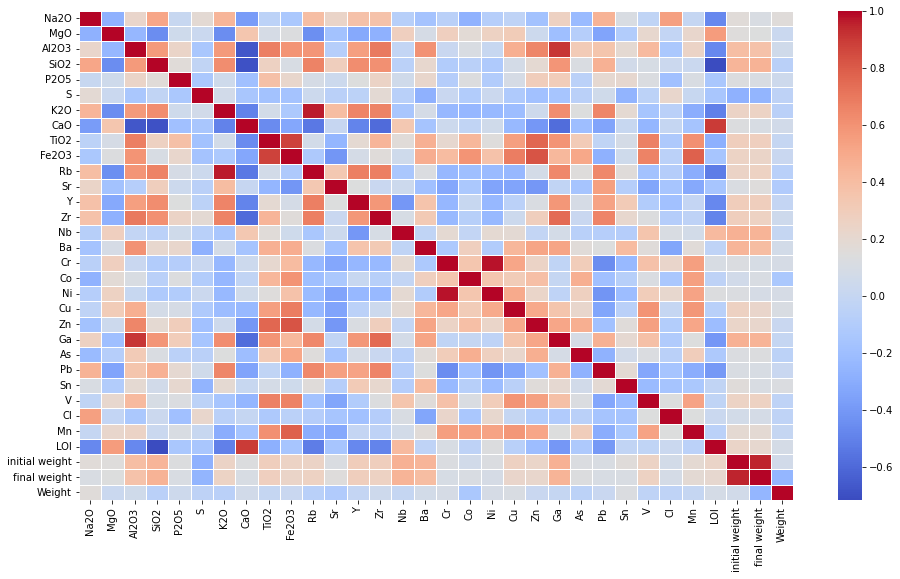

In [30]:
# Visualizing the data using heatmap
plt.figure(figsize=(16,9))
'''
Adjust heatmap color scheme with one of following options:
Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG,
PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r,
YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r,
gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako,
 mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r,
twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
'''
sns.heatmap(LOI.corr(), cmap="coolwarm", annot = False, linewidths=1)
plt.show()

#### 3. Performing Linear Regression:
The equation of a simple linear regression:
$\widehat{y} = \widehat{\beta}_0 + \widehat{\beta}_1x$
and $\widehat{\beta}_1$ values are known as **model coefficients** or **model parameters**

To obtain prediction equation, we follow next four steps:
1. Create X and y variables,
2. Create Train and Test set,
3. Train your model
4. Evaluate the model

In [31]:
# 1. Creating X and y variables
X = LOI['Weight']
y = LOI['LOI']

We need to split our variables into training and testing sets. Using the training set, we’ll build the model and perform the model on the testing set. We’ll divide the training and testing sets into a 7:3 ratio, respectively.

In [32]:
# Splitting the variables as training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

# Take a look at the train dataset
X_train
y_train

ModuleNotFoundError: No module named 'sklearn'

##### Building and training our model
In these step we will build our prediction equation with `statsmodel` and `sklearn`.
By default, the `statsmodel` library fits a line that passes through the origin. But if we observe the simple linear regression equation $\widehat{y} = \widehat{\beta}_0 + \widehat{\beta}_1x$, it has an intercept value as $\widehat{\beta}_0$. So, to have an intercept, we need to add the `add_constant` attribute manually.

In [ ]:
# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)
X_train_sm

Once we’ve added constant, we can fit the regression line using OLS (Ordinary Least Square) method present in the statsmodel. After that, we’ll see the parameters, i.e., $\widehat{\beta}_0$ and $\widehat{\beta}_1x$ of the straight line.

In [ ]:
# Fitting the regression line using 'OLS'. lr stands for linear regression
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

Let’s see the summary of all the different parameters of the regression line fitted like `R²`(Further details:
https://en.wikipedia.org/wiki/Coefficient_of_determination), probability of `F-statistic`, and `p-value` (further details: https://en.wikipedia.org/wiki/Ordinary_least_squares)

In [ ]:
# Performing a summary to list out all the different parameters of the regression line fitted
lr.summary()

From the statistics of the regression line, we need interpret some parameters to determine whether the model is viable or not.
Thus, the parameters we are interested on:
a. The `coefficients` and its `p-value`(significance)
b.`R-squared` value
c. `F-statistic` and its significance

a. when the variable coefficient and is corresponding `p-value` < 0.05;  at least one independent variable *x* is related to *y*.
If `p-value` ≥ 0.05, there is no relationship between **any** of the independent variables *x* and *y*.
b. `R-squared` value, means that  `R-squared`x100% of the *y* ( dependent variable ) variance be explained by the *x* (independent variable).
c. When the Probability of F-statistic has a very low p-value, practically zero, which gives us that the model fit is statistically significant.

In [ ]:
# Visualizing the regression line
plt.scatter(X_train, y_train)

Replace constant (5.555) and variable (0.044) by the outputs (constant and variable) of `lr.params` in the following code line:

In [ ]:
plt.plot(X_train, 5.555 + 0.044*X_train, 'r')
plt.show()

#### 4. Residual analysis

In linear regression we assume that the error terms (residuals) are normally distributed.
Basically, error can be represented like: `Error = y value - y predicted value`.
Let's analyse the residuals. Thus, We have to predict the y value from the training dataset of X using the predict attribute.
After that, we’ll create the residuals from the predicted data.

In [ ]:
# Predicting y_value using training data of X
y_train_pred = lr.predict(X_train_sm)
# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

Plot the histogram of the residuals to verify if they have or not a normal distribution

In [ ]:
# Plotting the histogram using the residual values
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

Visualizing if there are any pattern on the residuals plot:

In [ ]:
# Looking for any patterns in the residuals
plt.scatter(X_train,res)
plt.show()

#### 5. Predictions:
Now that we have fitted the regression line on our train dataset, we can make some predictions to the test data. Similar
to the training dataset, we have to `add_constant` to the test data and predict the *y* values using the `predict` attribute
present in the `statsmodel`.

In [ ]:
# Adding a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predicting the y values corresponding to X_test_sm
y_test_pred = lr.predict(X_test_sm)

# Printing the first 15 predicted values
y_test_pred

Now, let’s calculate the R² value for the above-predicted y-values. We can do that by merely importing the `r2_score` library
from ´sklearn.metrics´package.

In [ ]:
# Importing r2_square
from sklearn.metrics import r2_score

# Checking the R-squared value
r_squared = r2_score(y_test, y_test_pred)
r_squared

Notice that the R² value on test data must be within 5% of the R² value on training data. When this occurrs, we can conclude
that the model is pretty stable. Which means, what the model has learned on the training set can generalize on the unseen
test set.

Let's visualize the data:

In [ ]:
# Visualize the line on the test set
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()


